In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
ud = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

In [5]:
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [17]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [18]:
logs.platform.describe()

count      4500
unique        3
top       phone
freq       2753
Name: platform, dtype: object

In [45]:
## найти клиента / клиентов с наибольшим числом успешных заказов
## вывести идентификаторы таких клиентов в порядке возрастания 
max_success = logs.query("success == True").groupby('client', as_index = False).agg(
    {'platform' : 'count'}).sort_values(
    by = 'platform', ascending = False)
max_count = max_success.platform.max()
max_success = max_success[max_success.platform == max_count]
sorted(list(max_success['client']))


[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [46]:
## с какой платформы было совершено наибольшее число успешных операций
logs.query("success == True").groupby('platform', as_index = False).agg({'client' : 'count'})

,platform,client
0,computer,1090
1,phone,2019
2,tablet,180


In [52]:
## какая платформа наиболее популярна среди премиум клиентов
premium_clients = ud.query("premium == True")
merged_premium = logs.merge(premium_clients, how = 'inner', on = 'client')
merged_premium.groupby('platform', as_index = False).agg({'client' : 'count'})

,platform,client
0,computer,150
1,phone,246
2,tablet,24


<AxesSubplot: xlabel='age', ylabel='Count'>

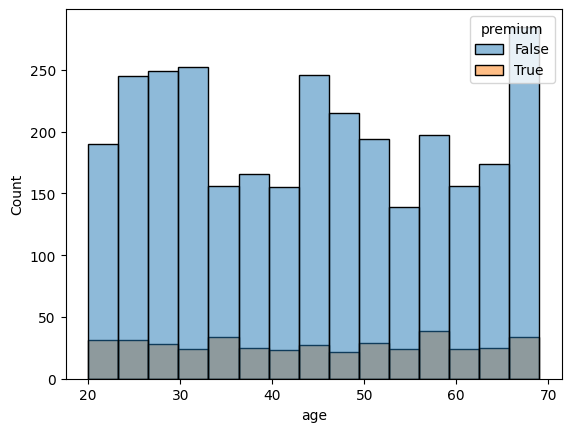

In [64]:
## распределение обычных / премиум клиентов в зависимости от возраста
merged_clients = logs.merge(ud, how = 'inner', on = 'client')
sns.histplot(data = merged_clients, x = 'age', hue = 'premium')

C:\Users\elusk\AppData\Local\Temp\ipykernel_8456\4279652245.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(success_operations.count_operation)


<AxesSubplot: xlabel='count_operation', ylabel='Density'>

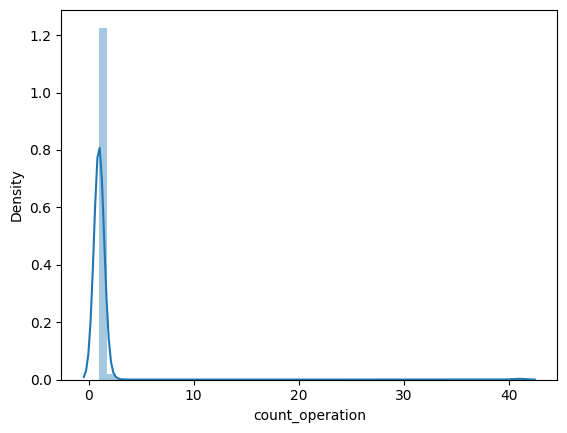

In [81]:
## построить распределение числа успешных операций
success_operations = logs.query("success == True").groupby('client', as_index = False).agg(
    {'platform' : 'count'})
success_operations = success_operations.rename(columns = {'platform' : 'count_operation'})
sns.distplot(success_operations.count_operation)

<AxesSubplot: xlabel='age', ylabel='count'>

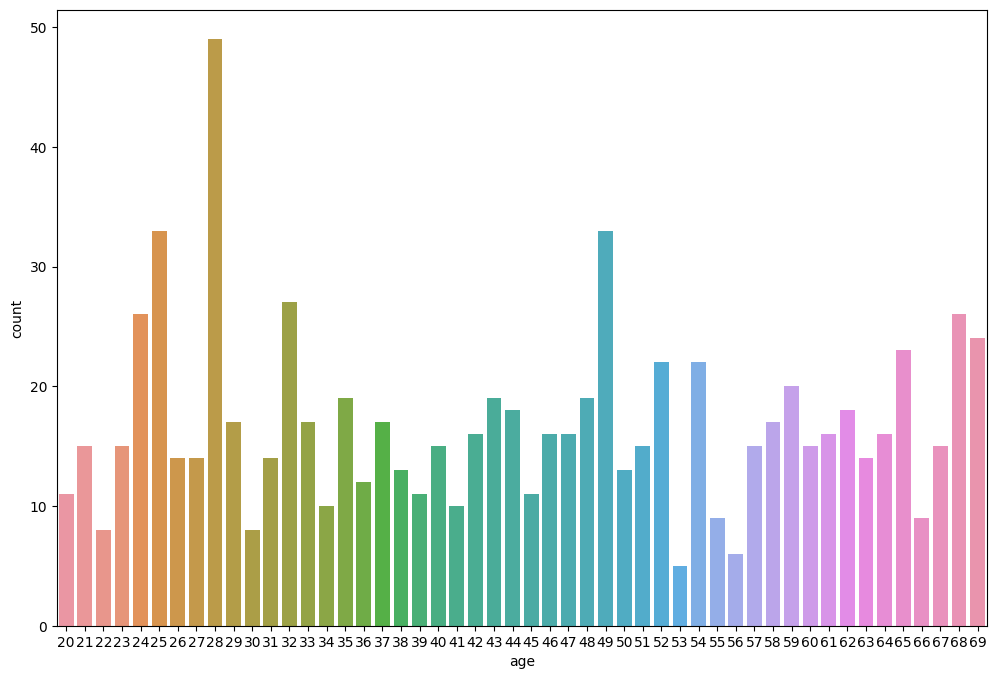

In [86]:
## число успешных операций с платформы "компьютер" в зависимости от возраста
merged_clients = logs.merge(ud, how = 'inner', on = 'client')
success_comp = merged_clients.query("platform == 'computer' and success == True")
plt.figure(figsize=(12, 8))
sns.countplot(x = success_comp['age'])
